In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import numpy as np
import seaborn as sb

📝2.시각화 초기

In [2]:
my_dpi = 120
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


In [3]:
origin = load_data("countries_aggregated")
origin.head()

[data] https://data.hossam.kr/data/lab09/countries_aggregated.xlsx
[desc] 전 세계 각국(country) 단위로 매일 집계된 COVID-19 감염 상황 (출처: Johns Hopkins University Center for Systems Science and Engineering)

field      description
---------  ----------------------------------------
Date       날짜
Country    국가명
Confirmed  해당 날짜를 기준으로 하는 누적 확진자 수
Recovered  해당 날짜를 기준으로 하는 누적 완치자 수
Deaths     해당 날짜를 기준으로 하는 누적 사망자 수



,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [4]:
origin.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


📘#02.데이터 기본 정보 파악

📝1.데이터 크기(행/열) 확인

In [5]:
print(f"데이터셋 크기:{origin.shape}")
print(f"열 개수:{origin.shape[1]}")
print(f"행 개수:{origin.shape[0]}")

데이터셋 크기:(161568, 5)
열 개수:5
행 개수:161568


📝2.데이터 타입 타입 확인

In [6]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


📝3.변수 유형 분류 및 타입 면환(수치형/범주형)

In [7]:
df = origin.astype({'Country':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  category      
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 5.2 MB


📝4.결측치 현황 파악

In [8]:
df.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

📘#03.수치형 변수 통계량

In [9]:
df[['Confirmed', 'Recovered','Deaths']].describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,161568.0,736156.934009,3.578884e+06,0.0,1220.0,23692.0,255842.00,80625120.0
Recovered,161568.0,145396.711892,9.748275e+05,0.0,0.0,126.0,17972.25,30974748.0
Deaths,161568.0,13999.436089,5.911358e+04,0.0,17.0,365.0,4509.00,988609.0


📝2.중심 경향성 및 산포도 해석

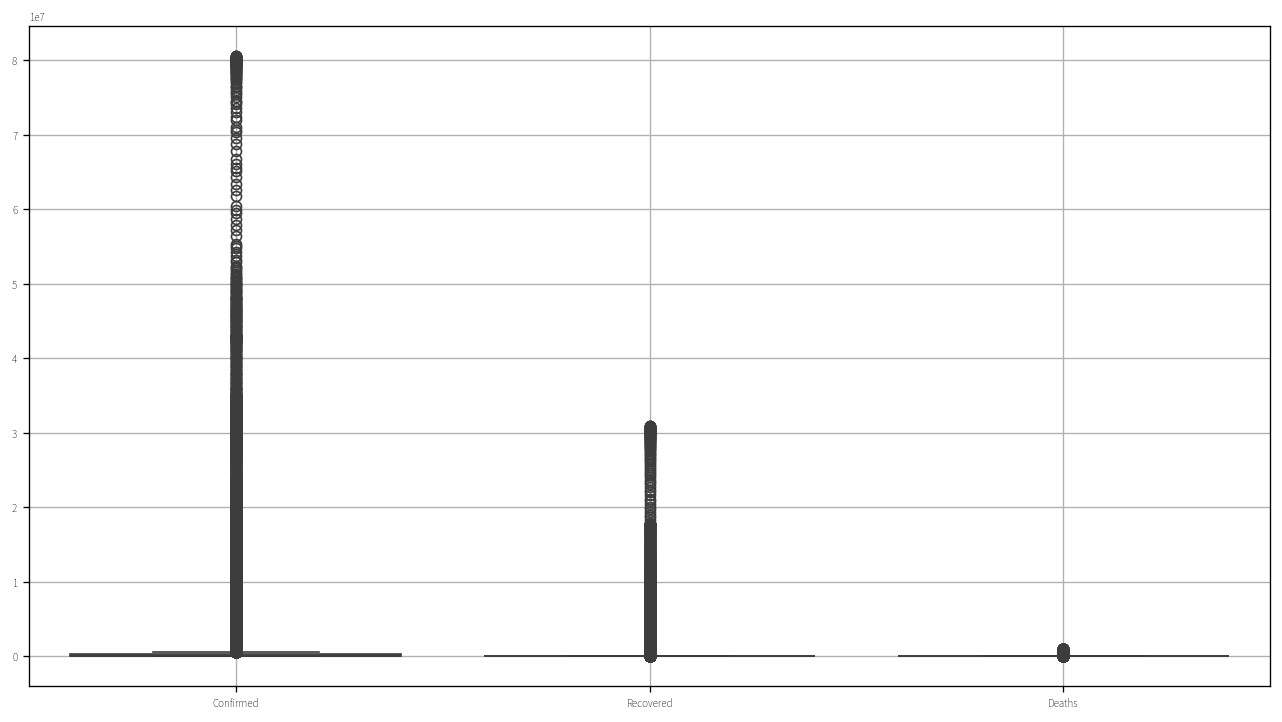

In [10]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.boxplot(data=df,orient="v")


ax.grid(True)
plt.tight_layout()
plt.show()
plt.close()

(2)로그값을 통한 데이터 분포 재확인

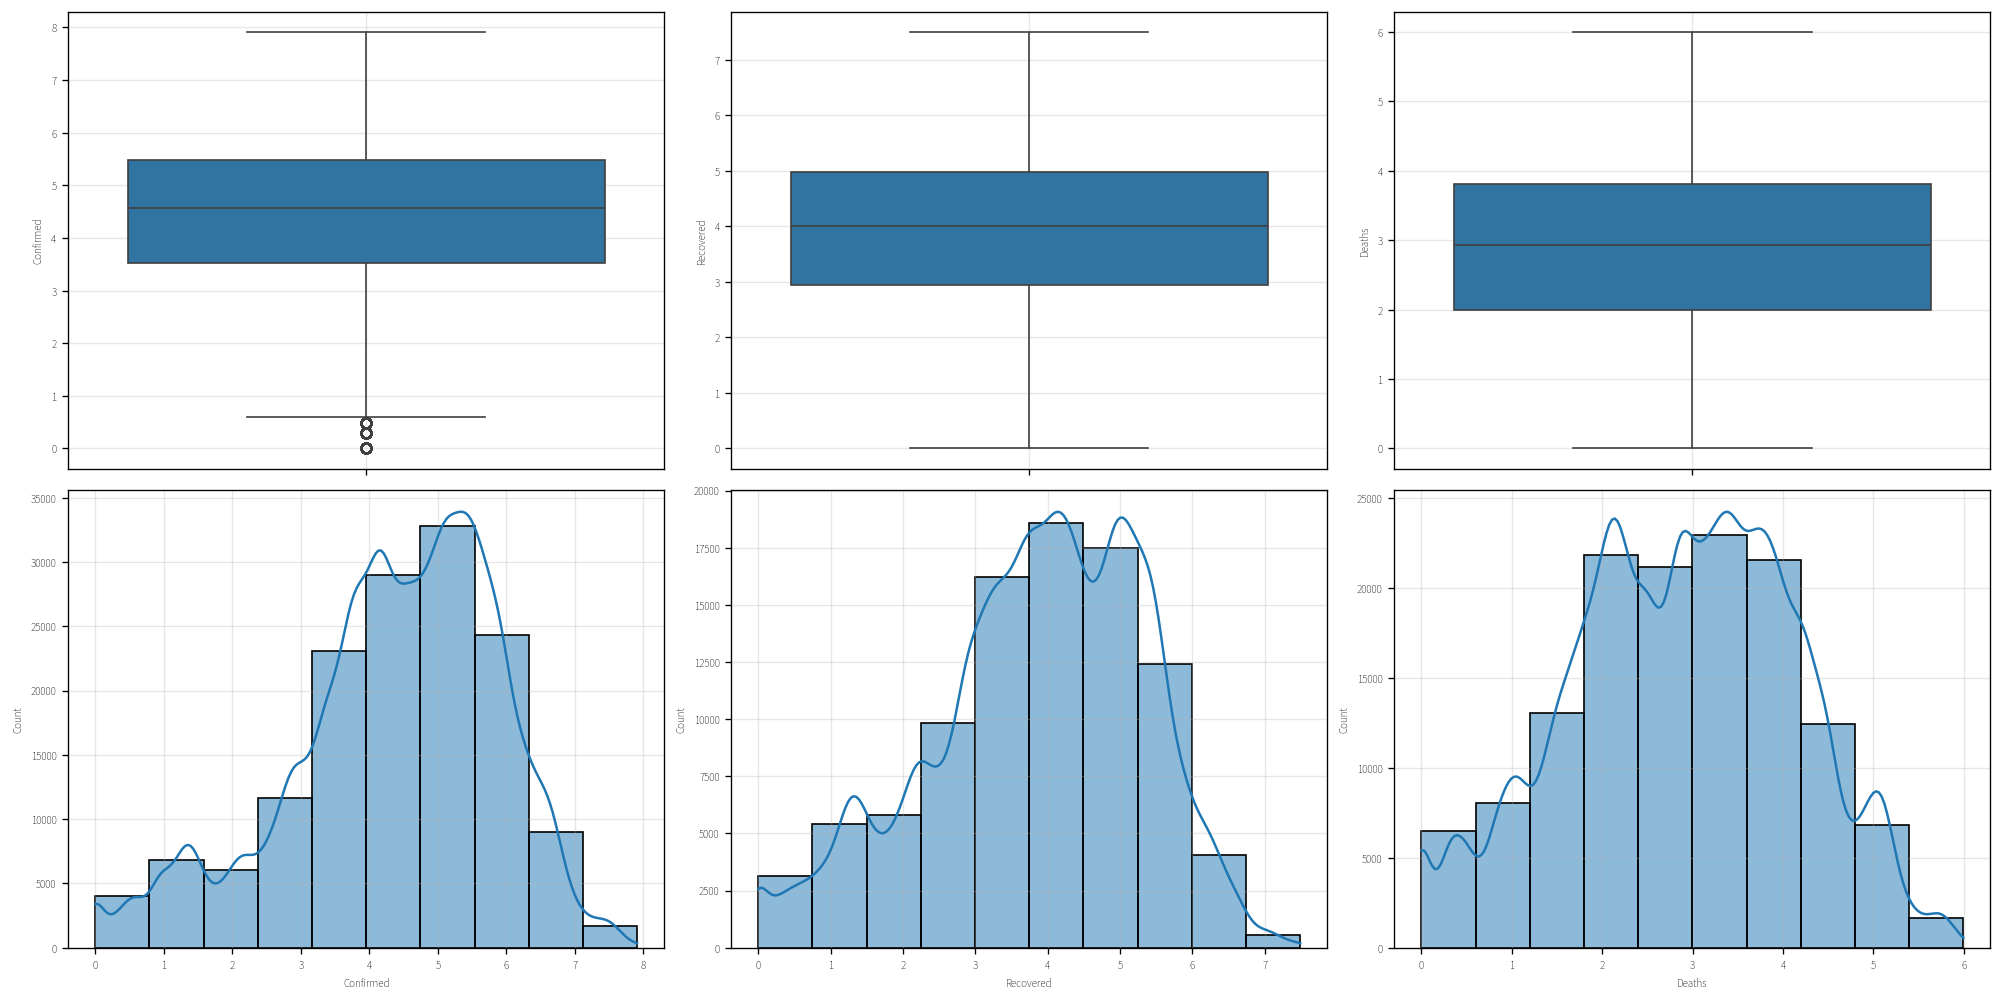

In [11]:
width_px = 2000
height_px = 1000
rows = 2
cols=3
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)


for i, col in enumerate(['Confirmed', 'Recovered','Deaths']):
    data = df[df[col] > 0][col]
    log_data = np.log10(data)
# 그래프 그리기->seaborn 사용
    sb.boxplot(log_data, orient='v',ax=ax[0][i])
    ax[0][i].grid(True, alpha=0.3)


    sb.histplot(log_data, bins=10, kde=True, ax=ax[1][i])
    ax[1][i].grid(True, alpha = 0.3)



plt.tight_layout()
plt.show()
plt.close()

📘#04.범주형 변수 통계량

📝1.빈도 및 최빈값 확인

In [12]:
df.describe(include='category')

,Country
count,161568
unique,198
top,Afghanistan
freq,816


📚[LAB-09]2.명목형 변수에 대한 기초 통계량

In [13]:
from hossam import load_data
from pandas import crosstab

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [14]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [15]:
origin = load_data('score')
origin

[data] https://data.hossam.kr/data/lab09/score.xlsx
[desc] 명목형 변수에 대한 탐색적 데이터 분석을 위한 샘플 데이터
[!] Cannot read metadata


,gender,score
0,M,A
1,M,C
2,M,B
3,M,B
4,W,A
5,W,C
6,W,C
7,W,B


In [16]:
df = origin.astype({'gender':'category', 'score':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  8 non-null      category
 1   score   8 non-null      category
dtypes: category(2)
memory usage: 404.0 bytes


📘#02.명목형 변수의 EDA

In [17]:
df.describe(include = 'category')

,gender,score
count,8,8
unique,2,3
top,M,B
freq,4,3


📝2.값의 종류별 빈도

In [18]:
for c in df.columns:
    print("🍭",c,"🍭")
    print(df[c].value_counts())

🍭 gender 🍭
gender
M    4
W    4
Name: count, dtype: int64
🍭 score 🍭
score
B    3
C    3
A    2
Name: count, dtype: int64


(2)빈도수 시각화

C:\Users\itwill\AppData\Local\Temp\ipykernel_8176\2553161826.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=v,ax=ax[i], palette = 'YlGn')
C:\Users\itwill\AppData\Local\Temp\ipykernel_8176\2553161826.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=v,ax=ax[i], palette = 'YlGn')


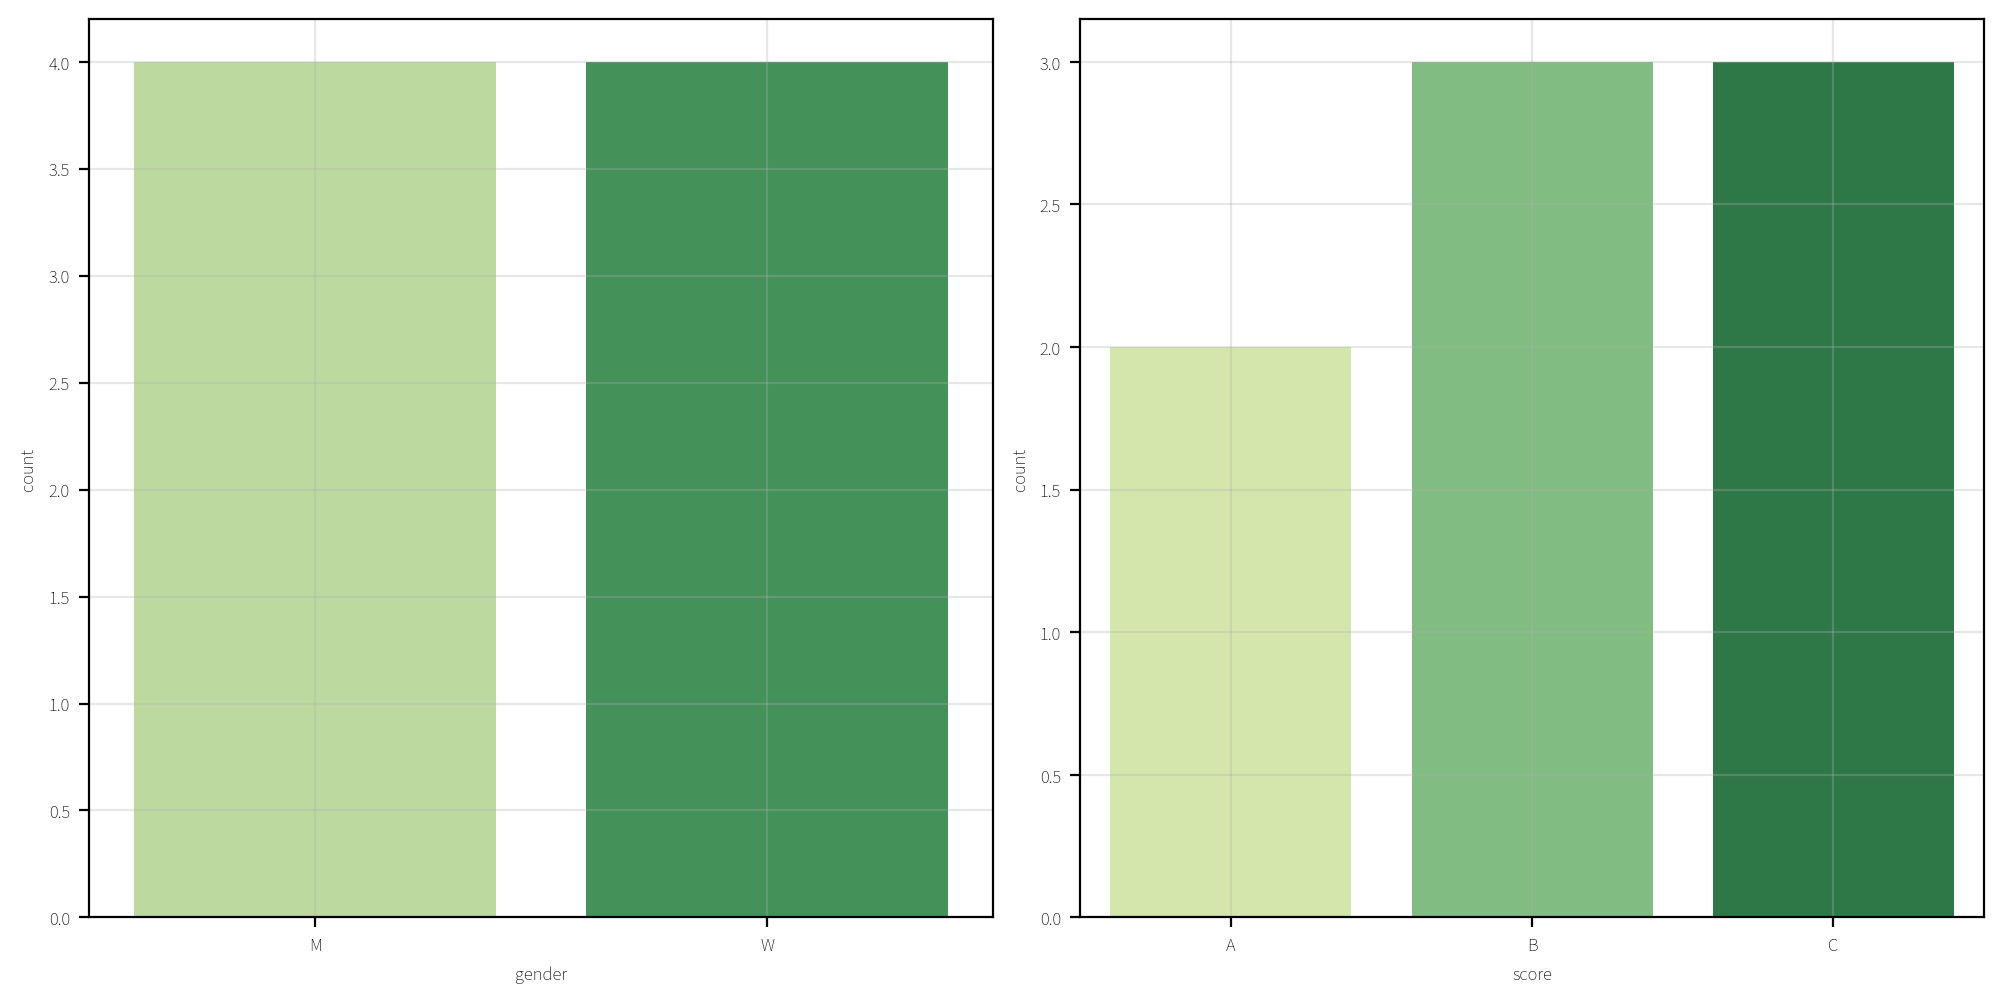

In [19]:
width_px = 2000
height_px = 1000
rows = 1
cols=2
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)


for i, v in enumerate(df.columns):

    sb.countplot(data=df, x=v,ax=ax[i], palette = 'YlGn')
    ax[i].grid(True, alpha=0.3)



plt.tight_layout()
plt.show()
plt.close()

📘#03.교차표

In [20]:
cb1 = crosstab(index = df['gender'], columns = df['score'], rownames=['성별'], colnames=['점수'])
cb1

점수,A,B,C
성별,,,
M,1,2,1
W,1,1,2


📝2.비율과 합계 표시

In [21]:
cb2 = crosstab(index=origin['gender'], columns=origin['score'],rownames=['성별'], colnames=['점수'],margins=True, normalize=True)
cb2

점수,A,B,C,All
성별,,,,
M,0.125,0.250,0.125,0.5
W,0.125,0.125,0.250,0.5
All,0.250,0.375,0.375,1.0


📝3.교차표 시각화

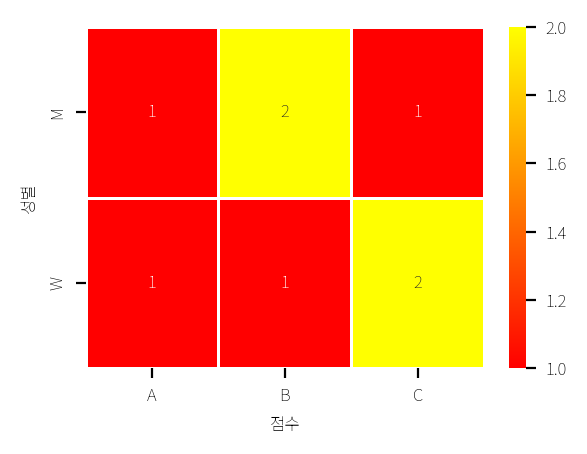

In [22]:
width_px = 600
height_px = 450
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.heatmap(data=cb1, annot=True, fmt = "d",linewidth=0.5,  cmap="autumn")
           


plt.tight_layout()
plt.show()
plt.close()

인사이트
‼️ 남성은 B, 여성은 C 점수가 상대적으로 많이 나타난다.
‼️ A점수는 성별 차이가 없다.
‼️ 성별에 따라 점수 분포 패턴이 뚜렷하게 다르다.